## 원-핫 인코딩(One - Hot Encoding)
선택해야 하는 선택지의 개수만큼의 차원을 가짐

선택지의 인덱스에 해당하는 원소에는 1, 나머지는 0의 값을 가지도록 하는 표현법


#### 정수로 인코딩을 하지 않는 이유
    정수로 인코딩을 하게 되면 A 클래스가 B 클래스보다 C클래스에 가깝다라는 

    정보를 주는 것과 같기 때문.

    ex)
    banana = 1, Tomato = 2, Apple = 3

    MSE를 사용하여 오차를 구하려고 하는데 직관적으로 보기위해 평균은 빼고 계산

    실제값 == Tomato, 예측값 == Banana

    (2-1)^2 = 1

    실제값 == Apple, 예측값 == Banana

    (3-1)^2 = 4

    이것은 Banana가 Apple보다는 Tomato에 가깝다는 정보를 주는것과 같다


## 로지스틱 회귀
#### 이진분류에 사용
True or Flase
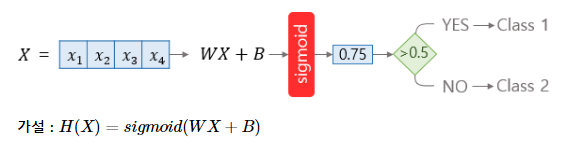


## 소프트맥스 회귀
#### 다중분류에 사용
어떤 클래스에 속하는지
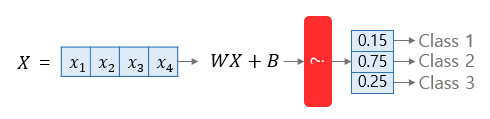


## Low level - softmax loss function

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

z = torch.FloatTensor([1,2,3])

# dim=1 은 첫번째 차원에 대하여 softmax function을 적용한다는 의미
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

# softmax 함수를 통과하면 각 클래스의 합은 1이된다.
print(hypothesis.sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [25]:
z = torch.rand(3,5, requires_grad=True)

# dim=1 은 두번째 차원에 대하여 softmax function을 적용한다는 의미
hypothesis = F.softmax(z, dim = 1)
print(hypothesis)

y = torch.randint(5,(3,)).long()
print(y)

tensor([[0.1956, 0.3318, 0.1484, 0.1468, 0.1774],
        [0.1888, 0.1166, 0.2721, 0.1641, 0.2584],
        [0.1435, 0.2769, 0.2245, 0.2395, 0.1155]], grad_fn=<SoftmaxBackward>)
tensor([1, 2, 3])


In [28]:
y_one_hot = torch.zeros_like(hypothesis)
print(y_one_hot.scatter_(1, y.unsqueeze(1), 1))

cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])
tensor(1.2780, grad_fn=<MeanBackward0>)


## High level - softmax loss function

In [31]:
# low level
print(torch.log(F.softmax(z, dim=1)))

# high level
print(F.log_softmax(z, dim=1))

tensor([[-1.6319, -1.1033, -1.9076, -1.9185, -1.7294],
        [-1.6670, -2.1489, -1.3014, -1.8075, -1.3534],
        [-1.9411, -1.2840, -1.4938, -1.4292, -2.1584]], grad_fn=<LogBackward>)
tensor([[-1.6319, -1.1033, -1.9076, -1.9185, -1.7294],
        [-1.6670, -2.1489, -1.3014, -1.8075, -1.3534],
        [-1.9411, -1.2840, -1.4938, -1.4292, -2.1584]],
       grad_fn=<LogSoftmaxBackward>)


(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

수식에서

torch.log(F.softmax(z, dim=1)) ==> F.log_sotfmax(z, dim=1)로 대체

(y_one_hot * F.log_sotfmax(z,dim=1)).sum(dim=1).mean()

F.nll_loss()를 사용하면 one-hot vector를 넣을 필요없이 바로 실제값을 사용가능

F.nll_loss(F.log_softmax(z, dim=1), y)



In [34]:
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.2780, grad_fn=<MeanBackward0>)

In [37]:
(y_one_hot * -F.log_softmax(z,dim=1)).sum(dim=1).mean()

tensor(1.2780, grad_fn=<MeanBackward0>)

In [32]:
F.nll_loss(F.log_softmax(z, dim=1),y)

tensor(1.2780, grad_fn=<NllLossBackward>)

그리고 F.cross_entropy()는 F.log_softmax()와 F.nll_loss()를 모두 포함하고 있다.

In [33]:
F.cross_entropy(z, y)

tensor(1.2780, grad_fn=<NllLossBackward>)

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

## low level

In [39]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [42]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
#tensor([[0., 0., 1.],
#        [0., 0., 1.],
#        [0., 0., 1.],
#        [0., 1., 0.],
#        [0., 1., 0.],
#        [0., 1., 0.],
#        [1., 0., 0.],
#        [1., 0., 0.]])

In [46]:
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.1)

epochs = 1000

for e in range(epochs + 1) :
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)
    
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if e % 100 == 0:
       print('Epoch {:4d}/{} Cost: {:.6f}'.format(
           e, epochs, cost.item()
       ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


## high level

In [48]:
model = nn.Linear(4, 3)

optimizer = optim.SGD(model.parameters(), lr=0.1)
epochs = 1000

for e in range(epochs + 1) :
    pred = model(x_train)
    
    cost = F.cross_entropy(pred, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if e % 100 == 0:
       print('Epoch {:4d}/{} Cost: {:.6f}'.format(
           e, epochs, cost.item()
       ))

Epoch    0/1000 Cost: 0.903512
Epoch  100/1000 Cost: 0.699025
Epoch  200/1000 Cost: 0.623482
Epoch  300/1000 Cost: 0.568215
Epoch  400/1000 Cost: 0.518916
Epoch  500/1000 Cost: 0.472044
Epoch  600/1000 Cost: 0.426222
Epoch  700/1000 Cost: 0.380781
Epoch  800/1000 Cost: 0.335447
Epoch  900/1000 Cost: 0.290681
Epoch 1000/1000 Cost: 0.251293


## Class

In [50]:
class softmaxClassifierModel(nn.Module) :
    def __init__(self):
        super().__init__()
        
        self.linear = nn.Linear(4,3)
        
    def forward(self, x):
        return self.linear(x)

In [51]:
model = softmaxClassifierModel()

optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs= 1000
for e in range(epochs + 1) :
    
    pred = model(x_train)
    
    cost = F.cross_entropy(pred, y_train)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if e % 100 == 0:
       print('Epoch {:4d}/{} Cost: {:.6f}'.format(
           e, epochs, cost.item()
       ))

Epoch    0/1000 Cost: 1.763922
Epoch  100/1000 Cost: 0.688639
Epoch  200/1000 Cost: 0.590509
Epoch  300/1000 Cost: 0.531270
Epoch  400/1000 Cost: 0.484428
Epoch  500/1000 Cost: 0.443484
Epoch  600/1000 Cost: 0.405754
Epoch  700/1000 Cost: 0.369627
Epoch  800/1000 Cost: 0.333876
Epoch  900/1000 Cost: 0.297585
Epoch 1000/1000 Cost: 0.261630
